## Code-102 (As identified in the Flowchart in the Thesis)

#### About This Document
This document is part of the coursework for the Dissertation Module (CASA0010) at UCL CASA. You can find the source code [here](https://github.com/burhanucl2023/pmgsy_casa_dissertation_code) and the data associated [here](https://tinyurl.com/Data-Dissertation)

### What does this Code Do?

This is the third in a series of four codes aimed at thoroughly analyzing the impact of the PMGSY road construction program in India on rural development, using nighttime light data as an indicator of economic activity. This document focuses on preparing a comprehensive zonal dataset for econometric analysis.

**1. Data Used in this Code:**
   - **Shrid Data**: Sourced from the SHRUG dataset provided by the Development Data Lab.
   - **State Boundaries Data**: The State Boundary shape file, representing the boundaries of 28 Indian states and 9 Union Territories (including newly formed Jammu and Ladakh, and Dadra and Nagar Haveli and Daman and Diu), available [here](https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020).

**2. Objectives of this Code:**
   - Combine shrid data with state boundary information.
   - Add zonal information for each shrid based on the state data.

**3. Result:**
   - Create a comprehensive zonal dataset that would be further used in making our final dataset to analyze the impact of the PMGSY road construction program on rural development using nighttime light data.
   - This dataset will be utilized in our other code, Code-100, to develop the final dataset for descriptive, statistical, and econometric analysis.

This document outlines the steps and code used, ensuring that the analysis is transparent and reproducible.


In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
from scipy.spatial import cKDTree
import os

After downloading the data folder, keep it in the same working directory as the Code for dynamically handling the location of file.

In [1]:
# Get the current working directory
script_dir = os.getcwd()

# Construct the full path to the first shapefile
shrid_boundary_path = os.path.join(script_dir, "data/102/Shape_files/shrid_shapefile_areasqkm.shp")

# Load the shrid boundary shapefile into a GeoDataFrame
shrid_boundary = gpd.read_file(shrid_boundary_path)

# Construct the full path to the second shapefile
state_boundaries_path = os.path.join(script_dir, "data/102/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp")

# Load the state boundaries shapefile into a GeoDataFrame
state_boundaries = gpd.read_file(state_boundaries_path)

In [2]:
shrid_boundary

,shrid2,pc11_id,n,geometry_t,polysource,n_ncontig,maxdist_km,area_sq_km,geometry
0,11-01-001-00001-000002,000002,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,5.120,"POLYGON ((73.96017 34.64970, 73.96121 34.65066..."
1,11-01-001-00001-000005,000005,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.293,"POLYGON ((74.05823 34.65639, 74.05905 34.65657..."
2,11-01-001-00001-000006,000006,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.380,"POLYGON ((74.08185 34.63302, 74.08281 34.63415..."
3,11-01-001-00001-000007,000007,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.943,"POLYGON ((74.12266 34.63367, 74.12290 34.63407..."
4,11-01-001-00001-000008,000008,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.392,"POLYGON ((74.14033 34.67003, 74.14270 34.67001..."
...,...,...,...,...,...,...,...,...,...
576148,11-06-076-00378-059668,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,14.344112,8.525,"POLYGON ((76.88636 29.14263, 76.88710 29.14159..."
576149,11-06-076-00380-059773,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,19.459710,7.461,"POLYGON ((76.71931 29.10674, 76.71997 29.10624..."
576150,11-16-289-99999-801523,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,5.0,37.378335,7.619,"POLYGON ((91.24174 23.86372, 91.24067 23.86738..."
576151,11-29-569-05523-608856,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,32.652555,4.909,"POLYGON ((74.75637 13.23005, 74.75668 13.22975..."


In [3]:
# Rename the column 'shrid2' to 'shrid'
shrid_boundary = shrid_boundary.rename(columns={'shrid2': 'shrid'})

In [4]:
shrid_boundary.head()

,shrid,pc11_id,n,geometry_t,polysource,n_ncontig,maxdist_km,area_sq_km,geometry
0,11-01-001-00001-000002,000002,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,5.120,"POLYGON ((73.96017 34.64970, 73.96121 34.65066..."
1,11-01-001-00001-000005,000005,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.293,"POLYGON ((74.05823 34.65639, 74.05905 34.65657..."
2,11-01-001-00001-000006,000006,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.380,"POLYGON ((74.08185 34.63302, 74.08281 34.63415..."
3,11-01-001-00001-000007,000007,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.943,"POLYGON ((74.12266 34.63367, 74.12290 34.63407..."
4,11-01-001-00001-000008,000008,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.392,"POLYGON ((74.14033 34.67003, 74.14270 34.67001..."


In [5]:
state_boundaries

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [6]:
# Ensure both GeoDataFrames have the same coordinate reference system
shrid_boundary = shrid_boundary.to_crs(state_boundaries.crs)

# Perform the spatial join using 'intersects'
shrid_state_intersects = gpd.overlay(shrid_boundary, state_boundaries[['State_Name', 'geometry']], how='intersection')

# Calculate the area of intersection
shrid_state_intersects['intersection_area'] = shrid_state_intersects.area

# For each shrid, find the state with the largest intersection area
predominant_state = shrid_state_intersects.loc[shrid_state_intersects.groupby('shrid')['intersection_area'].idxmax()]

# Drop the intersection_area column as it is no longer needed
predominant_state = predominant_state.drop(columns=['intersection_area'])

# Merge the predominant state back into the original shrid_boundary dataset
shrid_boundary_with_state = shrid_boundary.merge(predominant_state[['shrid', 'State_Name']], on='shrid', how='left')


# Rename the 'State_Name' column to 'state_name'
shrid_boundary_with_state = shrid_boundary_with_state.rename(columns={'State_Name': 'state_name'})

In [7]:
shrid_boundary_with_state

,shrid,pc11_id,n,geometry_t,polysource,n_ncontig,maxdist_km,area_sq_km,geometry,state_name
0,11-01-001-00001-000002,000002,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,5.120,"POLYGON ((8233208.233 4116377.812, 8233324.196...",Jammu and Kashmir
1,11-01-001-00001-000005,000005,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.293,"POLYGON ((8244124.529 4117283.264, 8244215.848...",Jammu and Kashmir
2,11-01-001-00001-000006,000006,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.380,"POLYGON ((8246753.318 4114121.001, 8246861.191...",Jammu and Kashmir
3,11-01-001-00001-000007,000007,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.943,"POLYGON ((8251296.932 4114208.475, 8251323.025...",Jammu and Kashmir
4,11-01-001-00001-000008,000008,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.392,"POLYGON ((8253263.410 4119129.185, 8253528.159...",Jammu and Kashmir
...,...,...,...,...,...,...,...,...,...,...
576148,11-06-076-00378-059668,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,14.344112,8.525,"POLYGON ((8558950.535 3393812.318, 8559032.631...",Haryana
576149,11-06-076-00380-059773,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,19.459710,7.461,"POLYGON ((8540355.031 3389239.053, 8540428.149...",Haryana
576150,11-16-289-99999-801523,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,5.0,37.378335,7.619,"POLYGON ((10156984.436 2736810.829, 10156865.3...",Tripura
576151,11-29-569-05523-608856,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,32.652555,4.909,"POLYGON ((8321841.391 1486027.446, 8321875.081...",Karnataka


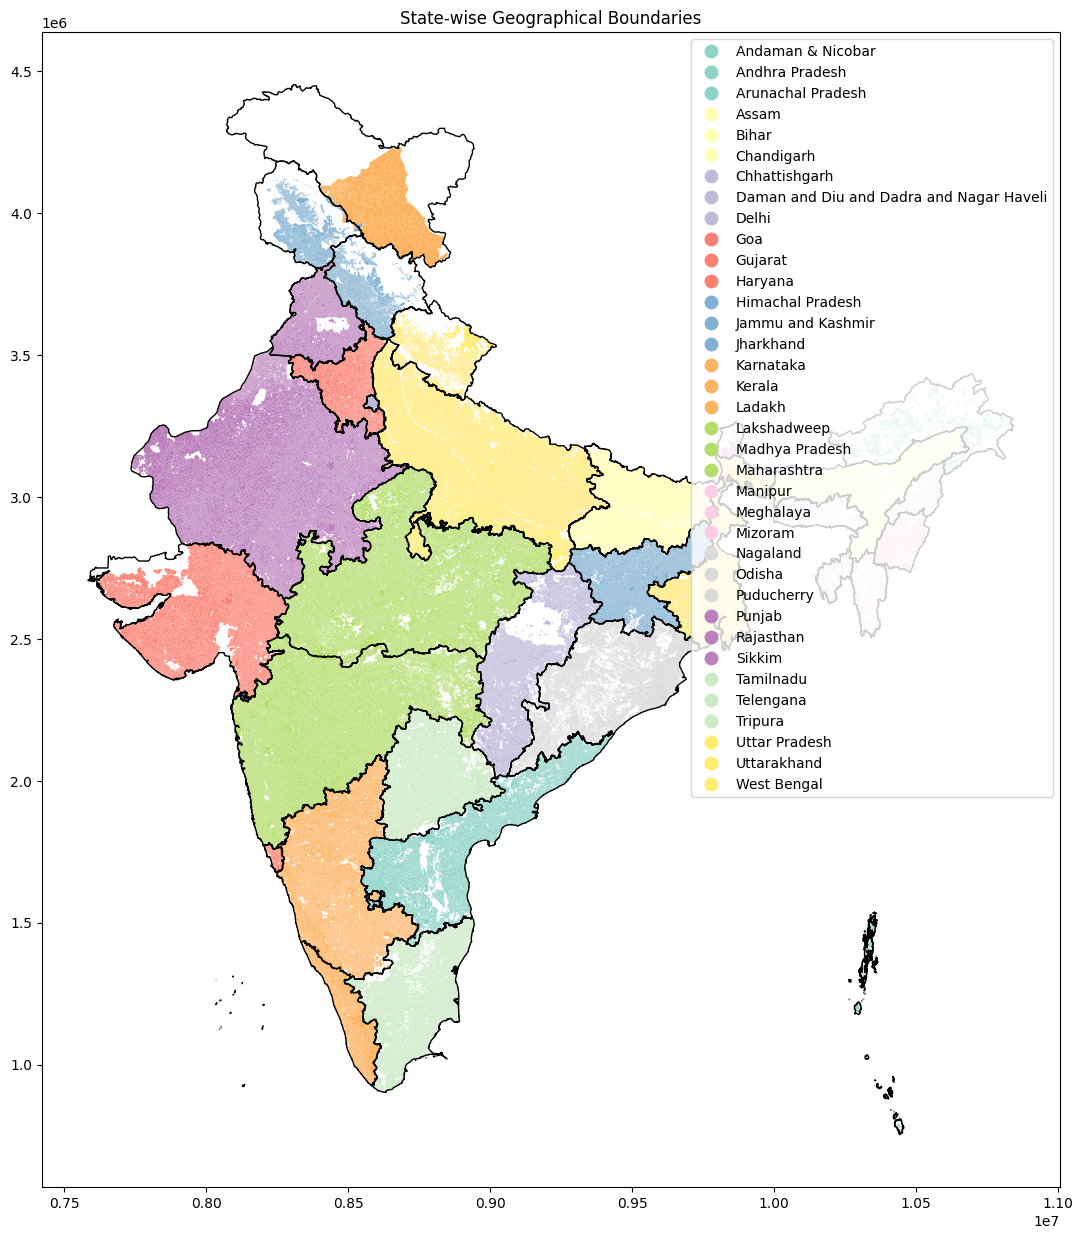

In [19]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(shrid_boundary_with_state, geometry='geometry')

# Plotting the data with state_name as hue
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(column='state_name', ax=ax, legend=True, legend_kwds={'bbox_to_anchor': (1, 1)}, cmap='Set3')
# Plot state boundaries
state_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
plt.title('State-wise Geographical Boundaries')
plt.show()

In [10]:
# Check the number of NaN values per column
nan_counts_shrid = shrid_boundary_with_state.isna().sum()

In [11]:
nan_counts_shrid

shrid              0
pc11_id          992
n                992
geometry_t       992
polysource         0
n_ncontig     575161
maxdist_km    575161
area_sq_km         0
geometry           0
state_name        70
dtype: int64

C:\Users\Burhan\AppData\Local\Temp\ipykernel_16144\3167303487.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


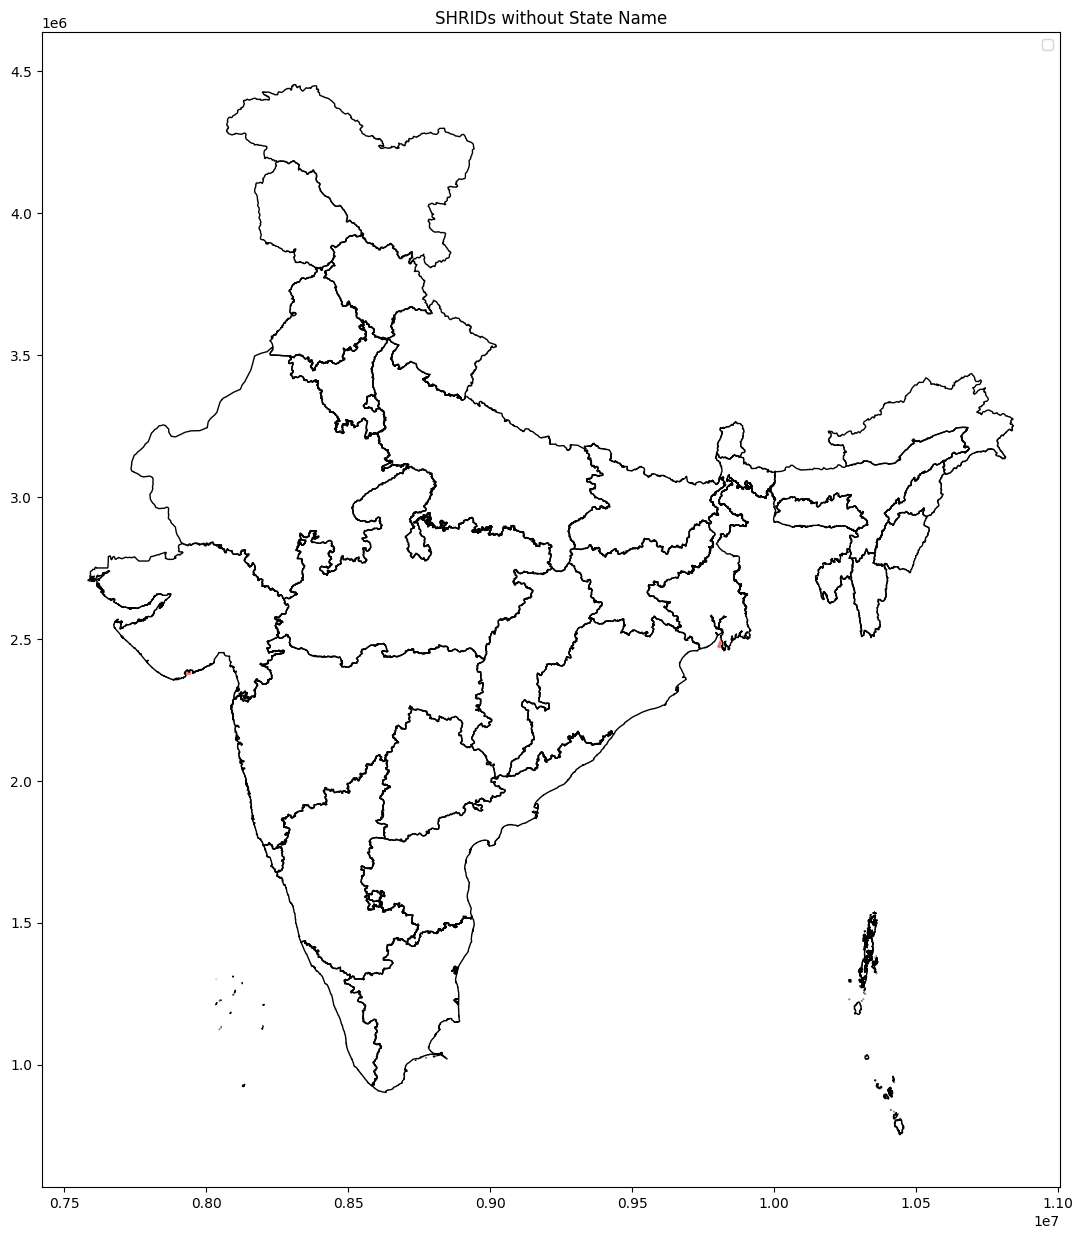

In [20]:
# Filter the rows where state_name is NaN
missing_state_name = gdf[gdf['state_name'].isna()]

# Select only the 'shrid', 'state_name', and 'area_sq_km' columns for display
missing_state_name_shrids = missing_state_name[['shrid', 'state_name', 'area_sq_km', 'geometry']]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot state boundaries
state_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot missing SHRIDs with red fill
missing_state_name_shrids.plot(ax=ax, color='red', markersize=10, label='Missing State Name', alpha=0.7)

# Adding title and legend
plt.title('SHRIDs without State Name')
plt.legend()
plt.show()

In [18]:
missing_state_name_shrids

,shrid,state_name,area_sq_km
2041,11-01-007-00031-002100,NaN,1.253
288140,11-19-343-02438-335238,NaN,14.131
288141,11-19-343-02438-335240,NaN,2.772
288142,11-19-343-02438-335241,NaN,7.839
288143,11-19-343-02438-335242,NaN,6.718
...,...,...,...
483725,11-27-517-04164-552440,NaN,3.101
553197,11-31-587-05621-627031,NaN,0.072
570311,11-35-638-05917-645032,NaN,0.692
570346,11-35-638-05918-645142,NaN,1.099


C:\Users\Burhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Number of SHRIDs still without state name after update: 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


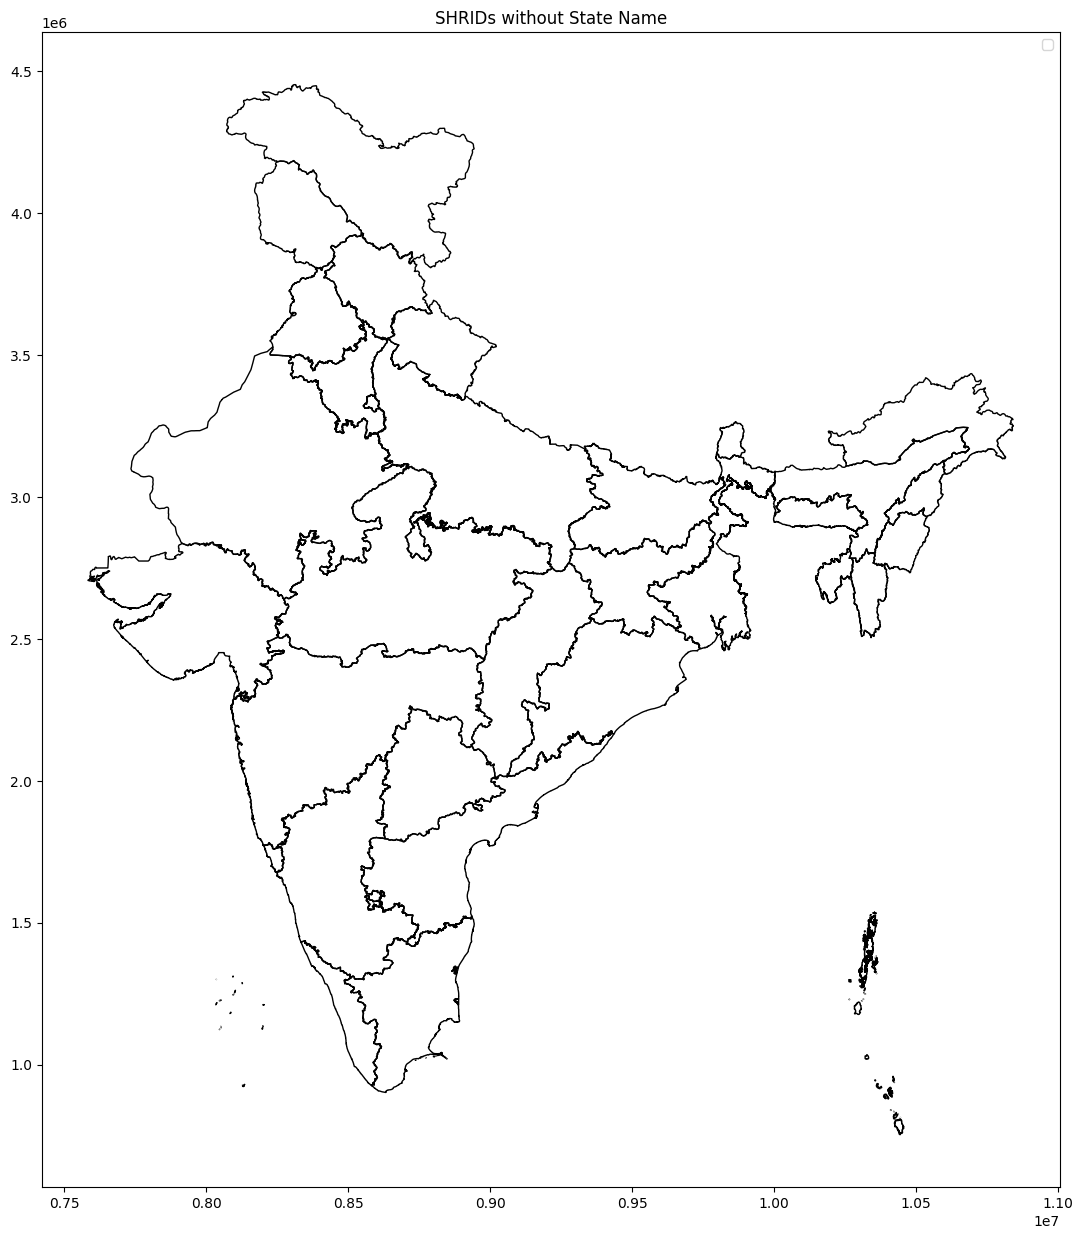

In [24]:

# Ensure both GeoDataFrames have the same coordinate reference system
shrid_boundary_with_state = shrid_boundary_with_state.to_crs(state_boundaries.crs)

# Filter the rows where state_name is NaN
missing_state_name = shrid_boundary_with_state[shrid_boundary_with_state['state_name'].isna()]

# Select SHRIDs with state names
valid_state_name = shrid_boundary_with_state.dropna(subset=['state_name'])

# Use centroids for nearest neighbor search
valid_centroids = valid_state_name.geometry.centroid
missing_centroids = missing_state_name.geometry.centroid

# Build the k-d tree
valid_coords = np.array(list(valid_centroids.apply(lambda geom: (geom.x, geom.y))))
missing_coords = np.array(list(missing_centroids.apply(lambda geom: (geom.x, geom.y))))
tree = cKDTree(valid_coords)

# Find the nearest neighbors
distances, indices = tree.query(missing_coords, k=1)

# Assign the state names based on the nearest neighbor
nearest_state_names = valid_state_name.iloc[indices]['state_name'].values
missing_state_name['state_name'] = nearest_state_names

# Update the original GeoDataFrame with the newly assigned state names for the missing SHRIDs
shrid_boundary_with_state.loc[missing_state_name.index, 'state_name'] = missing_state_name['state_name']

# Verify the update
missing_state_names_after_update = shrid_boundary_with_state[shrid_boundary_with_state['state_name'].isna()]
print(f"Number of SHRIDs still without state name after update: {missing_state_names_after_update.shape[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot state boundaries
state_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot missing SHRIDs with red fill (if any remain)
if not missing_state_names_after_update.empty:
    missing_state_names_after_update.plot(ax=ax, color='red', markersize=50, label='Missing State Name', alpha=0.7)

# Adding title and legend
plt.title('SHRIDs without State Name')
plt.legend()
plt.show()



In [26]:
# Check the number of NaN values per column
nan_counts_shrid = shrid_boundary_with_state.isna().sum()
nan_counts_shrid

shrid              0
pc11_id          992
n                992
geometry_t       992
polysource         0
n_ncontig     575161
maxdist_km    575161
area_sq_km         0
geometry           0
state_name         0
dtype: int64

In [32]:
shrid_boundary_with_state

,shrid,pc11_id,n,geometry_t,polysource,n_ncontig,maxdist_km,area_sq_km,state_name,geometry
0,11-01-001-00001-000002,000002,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,5.120,Jammu and Kashmir,"POLYGON ((8233208.233 4116377.812, 8233324.196..."
1,11-01-001-00001-000005,000005,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.293,Jammu and Kashmir,"POLYGON ((8244124.529 4117283.264, 8244215.848..."
2,11-01-001-00001-000006,000006,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.380,Jammu and Kashmir,"POLYGON ((8246753.318 4114121.001, 8246861.191..."
3,11-01-001-00001-000007,000007,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.943,Jammu and Kashmir,"POLYGON ((8251296.932 4114208.475, 8251323.025..."
4,11-01-001-00001-000008,000008,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.392,Jammu and Kashmir,"POLYGON ((8253263.410 4119129.185, 8253528.159..."
...,...,...,...,...,...,...,...,...,...,...
576148,11-06-076-00378-059668,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,14.344112,8.525,Haryana,"POLYGON ((8558950.535 3393812.318, 8559032.631..."
576149,11-06-076-00380-059773,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,19.459710,7.461,Haryana,"POLYGON ((8540355.031 3389239.053, 8540428.149..."
576150,11-16-289-99999-801523,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,5.0,37.378335,7.619,Tripura,"POLYGON ((10156984.436 2736810.829, 10156865.3..."
576151,11-29-569-05523-608856,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,32.652555,4.909,Karnataka,"POLYGON ((8321841.391 1486027.446, 8321875.081..."


In [33]:
# Zone mapping
zone_mapping = {
    'Andaman & Nicobar': 'Southern',
    'Chandigarh': 'Northern',
    'Daman and Diu and Dadra and Nagar Haveli': 'Western',
    'Delhi': 'Northern',
    'Haryana': 'Northern',
    'Jharkhand': 'Eastern',
    'Karnataka': 'Southern',
    'Kerala': 'Southern',
    'Lakshadweep': 'Southern',
    'Madhya Pradesh': 'Central',
    'Maharashtra': 'Western',
    'Odisha': 'Eastern',
    'Tamilnadu': 'Southern',
    'Chhattishgarh': 'Central',
    'Telengana': 'Southern',
    'Andhra Pradesh': 'Southern',
    'Goa': 'Western',
    'Himachal Pradesh': 'Northern',
    'Punjab': 'Northern',
    'Rajasthan': 'Northern',
    'Gujarat': 'Western',
    'Uttarakhand': 'Central',
    'Uttar Pradesh': 'Central',
    'Sikkim': 'North-Eastern',
    'Assam': 'North-Eastern',
    'Arunachal Pradesh': 'North-Eastern',
    'Nagaland': 'North-Eastern',
    'Manipur': 'North-Eastern',
    'Mizoram': 'North-Eastern',
    'Tripura': 'North-Eastern',
    'Meghalaya': 'North-Eastern',
    'West Bengal': 'Eastern',
    'Bihar': 'Eastern',
    'Ladakh': 'Northern',
    'Jammu and Kashmir': 'Northern'
}

# Adding zone column to the DataFrame
shrid_boundary_with_state['zone'] = shrid_boundary_with_state['state_name'].map(zone_mapping)


In [34]:
shrid_boundary_with_state

,shrid,pc11_id,n,geometry_t,polysource,n_ncontig,maxdist_km,area_sq_km,state_name,geometry,zone
0,11-01-001-00001-000002,000002,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,5.120,Jammu and Kashmir,"POLYGON ((8233208.233 4116377.812, 8233324.196...",Northern
1,11-01-001-00001-000005,000005,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.293,Jammu and Kashmir,"POLYGON ((8244124.529 4117283.264, 8244215.848...",Northern
2,11-01-001-00001-000006,000006,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,4.380,Jammu and Kashmir,"POLYGON ((8246753.318 4114121.001, 8246861.191...",Northern
3,11-01-001-00001-000007,000007,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.943,Jammu and Kashmir,"POLYGON ((8251296.932 4114208.475, 8251323.025...",Northern
4,11-01-001-00001-000008,000008,1.0,Polygon,1 shrid = 1 pc polygon,NaN,NaN,2.392,Jammu and Kashmir,"POLYGON ((8253263.410 4119129.185, 8253528.159...",Northern
...,...,...,...,...,...,...,...,...,...,...,...
576148,11-06-076-00378-059668,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,14.344112,8.525,Haryana,"POLYGON ((8558950.535 3393812.318, 8559032.631...",Northern
576149,11-06-076-00380-059773,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,19.459710,7.461,Haryana,"POLYGON ((8540355.031 3389239.053, 8540428.149...",Northern
576150,11-16-289-99999-801523,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,5.0,37.378335,7.619,Tripura,"POLYGON ((10156984.436 2736810.829, 10156865.3...",North-Eastern
576151,11-29-569-05523-608856,None,NaN,None,1 shrid = 1 manually picked polygon from far m...,2.0,32.652555,4.909,Karnataka,"POLYGON ((8321841.391 1486027.446, 8321875.081...",Southern


In [35]:
# Save to a shapefile
# shrid_boundary_with_state.to_file("shrid_boundary_with_state_and_zone.shp")

This completes adding the Zonal Information to our shrids (villages), which we will use in making our final dataset in Code-100